In [8]:
#Using validation sets
#Import packages
import torch
from torch import nn
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Import the dataset
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [10]:
#Building the model
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [11]:
#Training the model
from torch import optim

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

trainloss, testloss = [], []
epochs = 30
for e in range(epochs):
    print("Pass ", e+1, " ...")
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        validation_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                logps = model(images)
                loss = criterion(logps, labels)
                validation_loss += loss
                
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        trainloss.append(running_loss/len(trainloader))
        testloss.append(validation_loss/len(testloader))
        
        print("Training loss ", running_loss/len(trainloader))
        print("Test loss ", validation_loss/len(testloader))
        print("Accuracy ", accuracy/len(testloader))

Pass  1  ...
Training loss  0.5168127559109538
Test loss  tensor(0.4631)
Accuracy  tensor(0.8317)
Pass  2  ...
Training loss  0.3912095804013677
Test loss  tensor(0.4193)
Accuracy  tensor(0.8504)
Pass  3  ...
Training loss  0.3513613972010643
Test loss  tensor(0.3834)
Accuracy  tensor(0.8655)
Pass  4  ...
Training loss  0.32882370837112224
Test loss  tensor(0.3927)
Accuracy  tensor(0.8625)
Pass  5  ...
Training loss  0.3161545931609836
Test loss  tensor(0.3703)
Accuracy  tensor(0.8670)
Pass  6  ...
Training loss  0.301916672079675
Test loss  tensor(0.4201)
Accuracy  tensor(0.8525)
Pass  7  ...
Training loss  0.2888512442678785
Test loss  tensor(0.3659)
Accuracy  tensor(0.8729)
Pass  8  ...
Training loss  0.28230166711659826
Test loss  tensor(0.3730)
Accuracy  tensor(0.8700)
Pass  9  ...
Training loss  0.27474546758160157
Test loss  tensor(0.3538)
Accuracy  tensor(0.8722)
Pass  10  ...
Training loss  0.26549917735508893
Test loss  tensor(0.3719)
Accuracy  tensor(0.8698)
Pass  11  ...
Tr

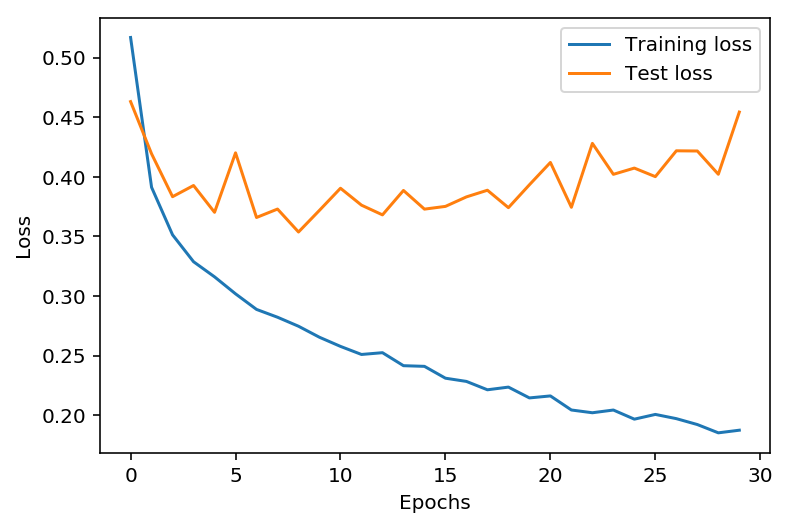

In [27]:
#Plotting the loss
plt.plot(trainloss, label="Training loss")
plt.plot(testloss, label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [29]:
#Adding dropout to avoid overfitting in network
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [32]:
#Training the model
from torch import optim

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

trainloss, testloss = [], []
epochs = 30
for e in range(epochs):
    print("Pass ", e+1, " ...")
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        validation_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                logps = model(images)
                loss = criterion(logps, labels)
                validation_loss += loss
                
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        trainloss.append(running_loss/len(trainloader))
        testloss.append(validation_loss/len(testloader))
        
        print("Training loss ", running_loss/len(trainloader))
        print("Test loss ", validation_loss/len(testloader))
        print("Accuracy ", accuracy/len(testloader))

Pass  1  ...
Training loss  0.607292450027171
Test loss  tensor(0.4682)
Accuracy  tensor(0.8250)
Pass  2  ...
Training loss  0.4795660017840644
Test loss  tensor(0.4568)
Accuracy  tensor(0.8354)
Pass  3  ...
Training loss  0.44684476133729856
Test loss  tensor(0.4413)
Accuracy  tensor(0.8451)
Pass  4  ...
Training loss  0.4388262308450904
Test loss  tensor(0.4022)
Accuracy  tensor(0.8588)
Pass  5  ...
Training loss  0.4243947650069621
Test loss  tensor(0.3984)
Accuracy  tensor(0.8566)
Pass  6  ...
Training loss  0.41224434743049554
Test loss  tensor(0.4053)
Accuracy  tensor(0.8564)
Pass  7  ...
Training loss  0.4052641372055387
Test loss  tensor(0.3802)
Accuracy  tensor(0.8602)
Pass  8  ...
Training loss  0.3969631640752877
Test loss  tensor(0.4133)
Accuracy  tensor(0.8484)
Pass  9  ...
Training loss  0.3975117763222408
Test loss  tensor(0.3967)
Accuracy  tensor(0.8603)
Pass  10  ...
Training loss  0.39759946760655973
Test loss  tensor(0.3933)
Accuracy  tensor(0.8630)
Pass  11  ...
Tra

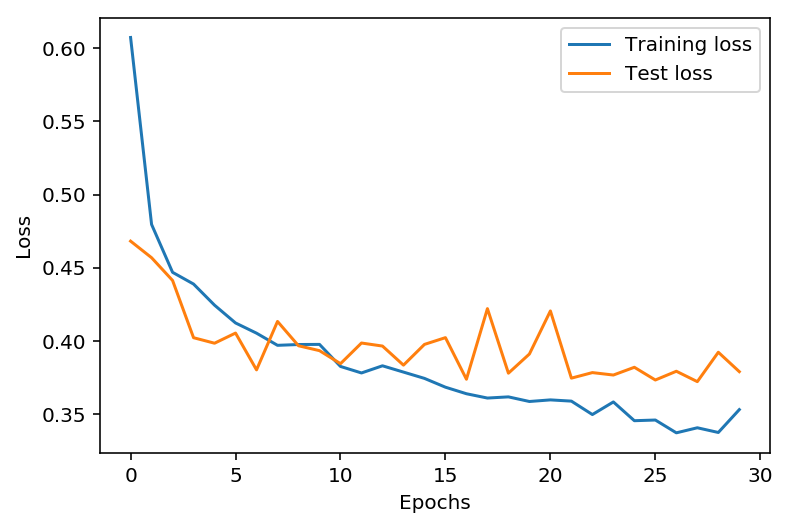

In [38]:
#Plotting the loss
plt.plot(trainloss, label="Training loss")
plt.plot(testloss, label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [54]:
#Testing the results

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()

logps = model(images)
ps = torch.exp(logps)
print(ps[0].argmax())
print(labels[0])


tensor(2)
tensor(2)
